### Price Pradictor ML Model

##### Importing Basic Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_excel(r'F:\C Drive\Desktop\ML\Research Project Sem-IV\HOUSING DATA 2.xlsx')
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
print(housing.keys())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,496.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.280415,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701312,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.883000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.620500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# .describe() function shows the EDD (Extended Data Dictionary) of all the Features.
# housing data is not evenlly distributed. This function provide to identify the issues in the data such as Outliers,typing error,presence of missing values.
# With the help of this function and knowledge of basic statistics we can easily detect the Charecteristics of skewness. 

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       496 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
housing.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM         10
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64

In [9]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

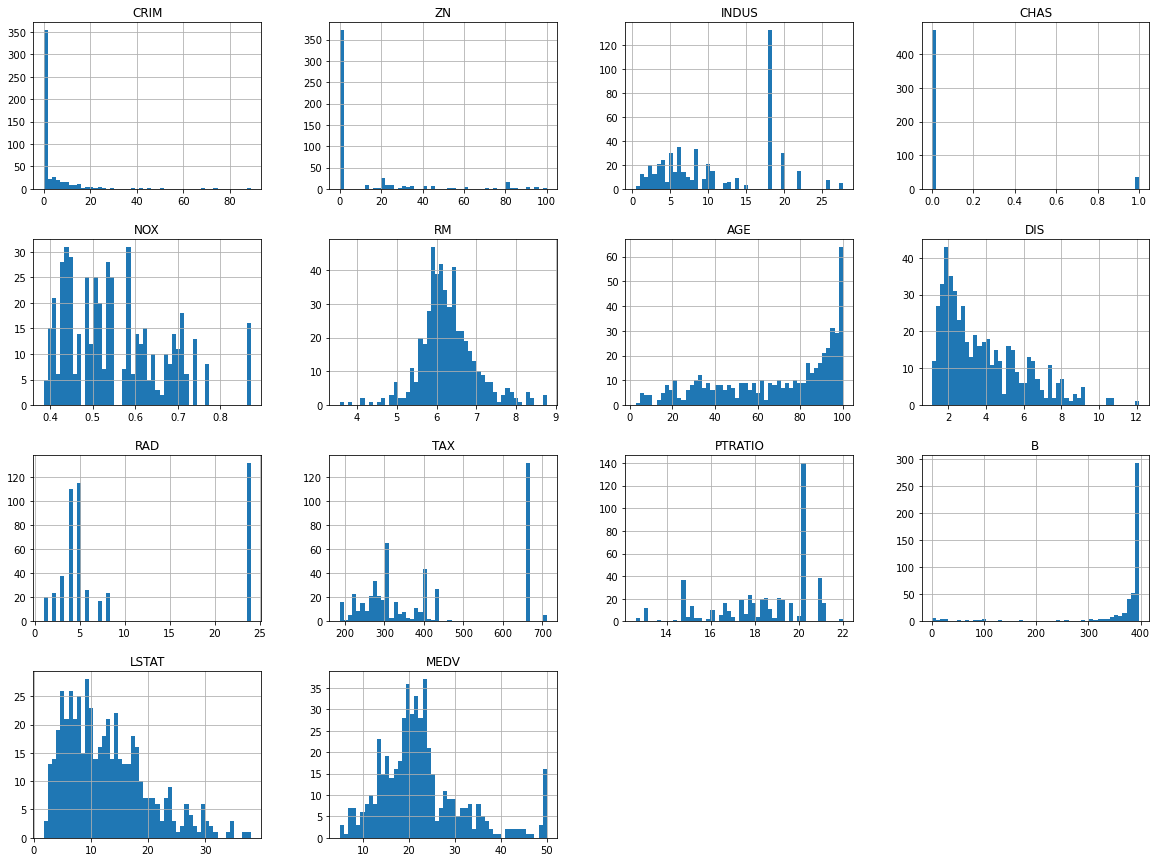

In [10]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))

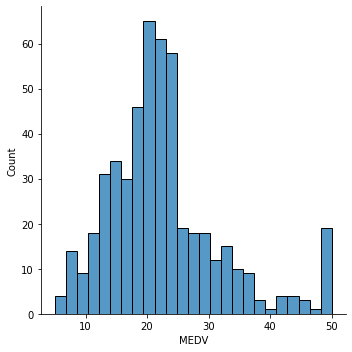

In [11]:
sns.displot(housing['MEDV'],bins=25)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

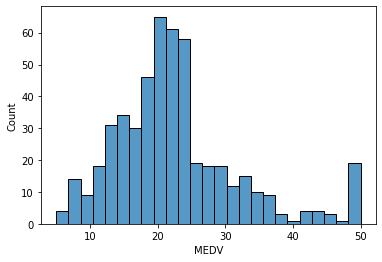

In [12]:
sns.histplot(housing['MEDV'],bins=25)

C:\Compiler\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV', ylabel='count'>

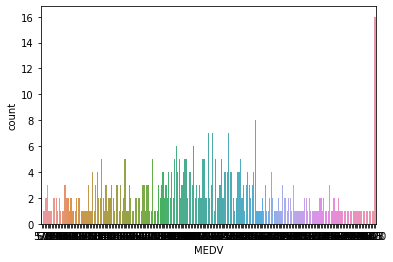

In [13]:
sns.countplot(housing["MEDV"])  #For discrete variable it is more convenient

C:\Compiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


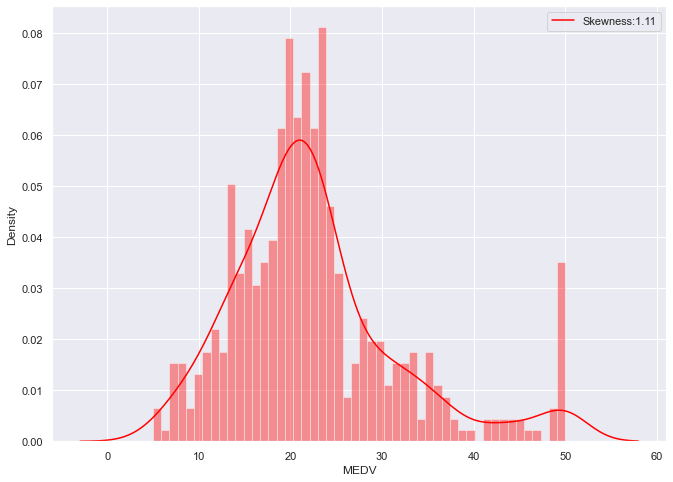

In [14]:
sns.set(rc={'figure.figsize':(11,8)})
bar=sns.distplot(housing['MEDV'],bins=50,color="red")
bar.legend(["Skewness:{:.2f}".format(housing["MEDV"].skew())])

C:\Compiler\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


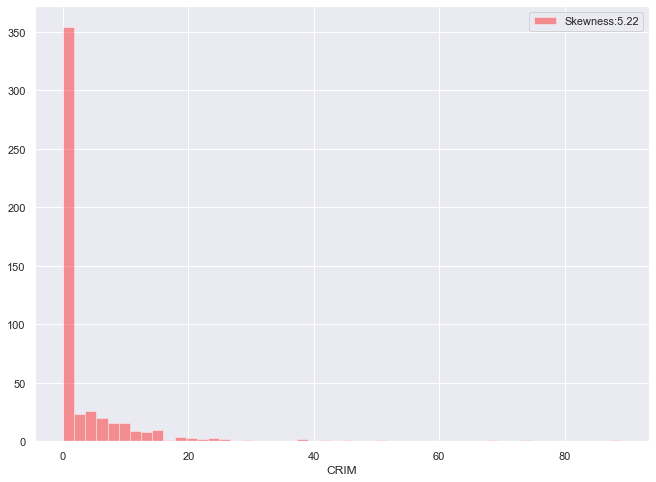

In [15]:
bar=sns.distplot(housing['CRIM'],bins=50,color="red",kde=False) 
bar.legend(["Skewness:{:.2f}".format(housing["CRIM"].skew())])

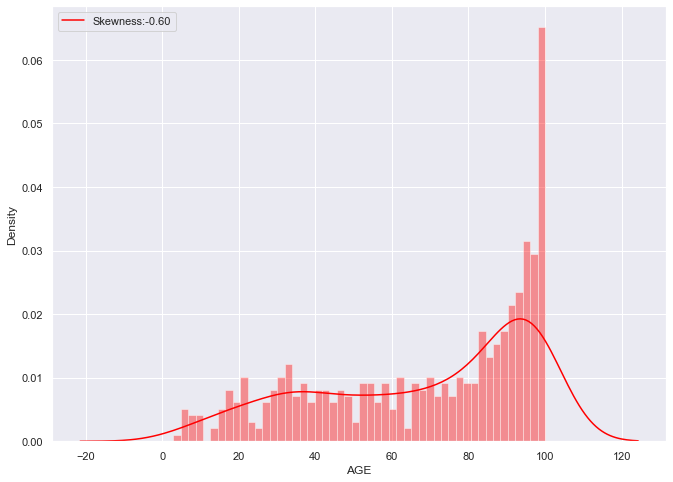

In [16]:
bar=sns.distplot(housing['AGE'],bins=50,color="red")    #negatively skewed
bar.legend(["Skewness:{:.2f}".format(housing["AGE"].skew())])

<AxesSubplot:>

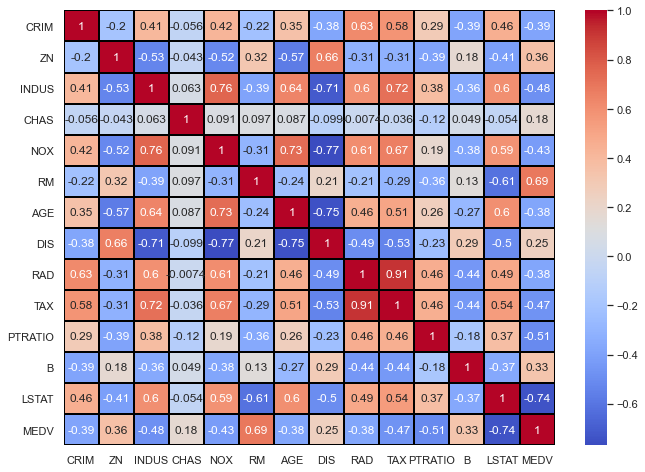

In [17]:
correlation_matrix = housing.corr()
sns.heatmap(data=correlation_matrix, cmap="coolwarm", annot=True, linewidths=1, linecolor='black')

### Train Test Spliting

In [18]:
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [19]:
train_set, test_set = split_train_test(housing,0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [20]:
print(f"Rows in Train Set: {len(train_set)}\nRows in Test Set: {len(test_set)}\n")

Rows in Train Set: 405
Rows in Test Set: 101



In [21]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size = 0.2, random_state=42)
print(f"Rows in Train Set: {len(train_set)}\nRows in Test Set: {len(test_set)}\n")

Rows in Train Set: 404
Rows in Test Set: 102



In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index ,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [24]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [25]:
376/28

13.428571428571429

In [26]:
95/7

13.571428571428571

In [27]:
housing = strat_train_set.copy()
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


### Looking for correlation

In [28]:
corr_matrix = housing.corr()

In [29]:
corr_matrix ['MEDV'].sort_values( ascending=False)

MEDV       1.000000
RM         0.672870
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

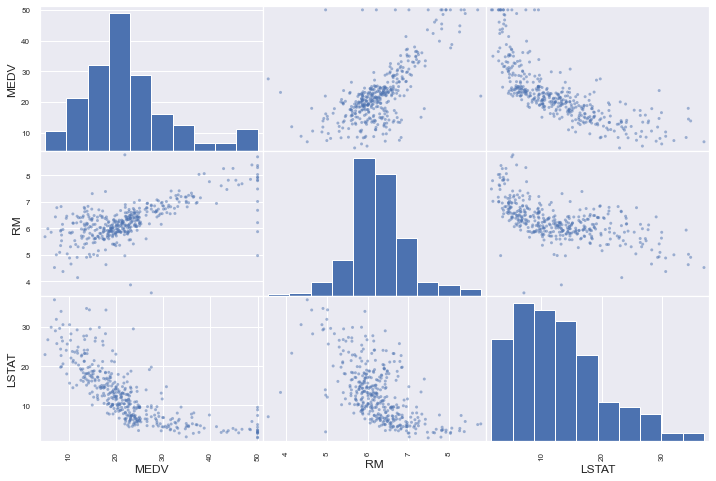

In [30]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

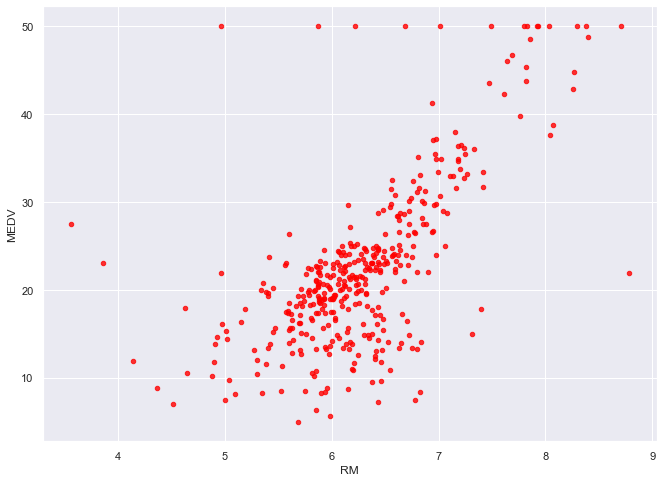

In [31]:
housing.plot(kind="scatter",x="RM",y="MEDV",color="Red",alpha=0.8)

### Trying Out Attributes Combination

In [32]:
#housing["TAXRM"] = housing["TAX"] / housing["RM"]

In [33]:
#housing["TAXRM"]

In [34]:
#corr_matrix = housing.corr()
#corr_matrix["MEDV"].sort_values(ascending=False)

In [35]:
#housing.plot(kind="scatter",y="MEDV",x="TAXRM",color="Red",alpha=0.9)

In [36]:
#housing = strat_train_set.drop("MEDV",axis=1)
#housing_labels = strat_train_set["MEDV"].copy()

In [37]:
#housing_labels

### Missing Attributes

In [38]:
#housing = pd.read_excel(r'F:\C Drive\Desktop\ML\Research Project Sem-IV\HOUSING DATA 2.xlsx')
#housing

In [39]:
#housing.describe()

### To take care of missing attributes, you have three options:
    1. Get rid of the missing Data Points
    2. Get rid of the whole attributes
    3. Set the value to some value (0, mean, median)

In [40]:
housing.dropna(subset=["RM"])      #for option 1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [41]:
housing.dropna(subset=["RM"]).shape

(396, 14)

In [42]:
housing.drop("RM",axis=1)  #for option 2
# There is no column of RM and also the original housing Dataframe will remain unchanged.

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [43]:
housing.drop("RM",axis=1).shape

(404, 13)

In [44]:
median = housing["RM"].median() #for option 3
# Note that original housing Dataframe will remain unchanged.

In [45]:
median

6.209

In [46]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [47]:
housing.shape

(404, 14)

In [48]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,396.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.272596,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711174,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.875000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [49]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan,strategy="median")
imp_median.fit(housing)

SimpleImputer(strategy='median')

In [50]:
imp_median.statistics_.shape

(14,)

In [51]:
imp_median.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01, 2.11500e+01])

In [52]:
I = imp_median.transform(housing)

In [53]:
#I

In [54]:
housing_tr = pd.DataFrame(I,columns=housing.columns)

In [55]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.271337,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.704136,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.626000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [56]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

### Scikit_learn Design

Primarily, three types of object
1. Estimators - It estimates some parameter based on dataset. eg. Imputer
                It has a fit method and transform method.
                Fit method fits the dataset and calculate internal parameters.
2. Transformers - Transform method takes input and returns output based on the learnings from fit().
                It also has a convenience function called fit_transform(),which fits and then transforms.
3. Predictors - Linear Regression Model is an example of predictors.
                fit() and predict() are two common function.
                It also give score() function, which will evaluate the predictions.

### Feature Scaling 

Primarilly, two types of feature scaling method:
1. Min-Max scaling (Normalization):
                   (value-min)/(max-min)
                   sklearn provides a class called Minmaxscaler for this.
2. Standardization:
                    (value-mean)/std
                    sklearn provides a class called standardscaler for this.
                    
 

### Creating Pipeline

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imp_median",SimpleImputer( strategy='median')),
    #.....Add as many as you want in your pipeline.
    ("Std_scaler",StandardScaler()), 
])

In [58]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [59]:
#housing_num_tr

In [60]:
housing_num_tr.shape

(404, 13)

### Selecting a desired model for Price Pradictor ML Model 

In [61]:
#housing = strat_train_set.drop("MEDV",axis=1)
#housing_labels = strat_train_set["MEDV"].copy()

### 1.Linear Regression :

In [62]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model.fit(housing_num_tr,housing_labels)

In [63]:
#some_data = housing.iloc[:5]

In [64]:
#some_labels = housing_labels.iloc[:5]

In [65]:
#prepared_data = my_pipeline.transform(some_data)

In [66]:
#model.predict(prepared_data)

In [67]:
#some_labels

In [68]:
#list(some_labels)

### Evaluating the model

In [69]:
#from sklearn.linear_model import LinearRegression
#housing_predictions = model.predict(housing_num_tr)
#mse = mean_squared_error(housing_labels,housing_predictions)
#rmse = np.sqrt(mse)

In [70]:
#rmse

### 2.Decision Tree Regressor :

In [71]:
#from sklearn.tree import DecisionTreeRegressor
#model = DecisionTreeRegressor()
#model.fit(housing_num_tr,housing_labels)

In [72]:
#some_data = housing.iloc[:5]
#some_labels = housing_labels.iloc[:5]
#prepared_data = my_pipeline.transform(some_data)
#model.predict(prepared_data)
#list(some_labels)

### Evaluating the model

In [73]:
#from sklearn.metrics import mean_squared_error
#housing_predictions = model.predict(housing_num_tr)
#mse = mean_squared_error(housing_labels,housing_predictions)
#rmse = np.sqrt(mse)
#rmse

### 3. Random Forest Regressor:

In [74]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [75]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

### Evaluating the model

In [76]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)
rmse

1.248805271623899

### Using better evaluation technique - Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [78]:
rmse_scores

array([2.89242518, 2.67237062, 4.44516964, 2.45390079, 3.25030641,
       3.21882787, 4.38939433, 4.70138987, 3.07407856, 3.65044415])

In [79]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean",scores.mean())
    print("Standard deviation:",scores.std())

In [80]:
print_scores(rmse_scores)

Scores: [2.89242518 2.67237062 4.44516964 2.45390079 3.25030641 3.21882787
 4.38939433 4.70138987 3.07407856 3.65044415]
Mean 3.4748307435048376
Standard deviation: 0.7493503139506953


### Saving the model

In [81]:
from joblib import dump,load
dump(model,"Price Pradictor.joblib")

['Price Pradictor.joblib']

### Testing the Model on test data

In [82]:
x_test = strat_test_set.drop("MEDV",axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,y_test)

[23.705 11.552 25.401 21.956 18.942 15.095 19.883 14.542 31.501 38.706
 19.866 12.043 24.735 24.799 19.672 10.753 31.339 14.561 23.387 18.606
 19.772 18.117 15.839 22.122 17.91  31.898 16.324 33.496  8.749 33.909
 23.92  21.435 23.307 10.904 20.871 11.302 41.43  24.277 24.436 41.756
 24.016 28.925 20.594 20.565 19.044 33.684 43.667 20.07  20.146 22.553
 21.221 14.812 21.472 15.158 24.475 33.45  41.286 29.619 19.284 20.928
 46.947  9.945 18.859 27.633 15.158 32.783 19.697 18.161 19.082 34.42
 29.246 22.971 21.246 23.295 35.708 12.921 15.924 20.304 21.068 21.37
 22.474 21.456 14.328 22.766 20.528 21.158 13.842 20.996 22.053 23.224
 18.459 27.774  7.187 25.794 18.529 28.493 20.219 31.683 14.539 26.934
 20.817 20.299] 342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64


In [83]:
print(final_predictions,list(y_test))

[23.705 11.552 25.401 21.956 18.942 15.095 19.883 14.542 31.501 38.706
 19.866 12.043 24.735 24.799 19.672 10.753 31.339 14.561 23.387 18.606
 19.772 18.117 15.839 22.122 17.91  31.898 16.324 33.496  8.749 33.909
 23.92  21.435 23.307 10.904 20.871 11.302 41.43  24.277 24.436 41.756
 24.016 28.925 20.594 20.565 19.044 33.684 43.667 20.07  20.146 22.553
 21.221 14.812 21.472 15.158 24.475 33.45  41.286 29.619 19.284 20.928
 46.947  9.945 18.859 27.633 15.158 32.783 19.697 18.161 19.082 34.42
 29.246 22.971 21.246 23.295 35.708 12.921 15.924 20.304 21.068 21.37
 22.474 21.456 14.328 22.766 20.528 21.158 13.842 20.996 22.053 23.224
 18.459 27.774  7.187 25.794 18.529 28.493 20.219 31.683 14.539 26.934
 20.817 20.299] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

In [84]:
final_rmse

2.8452470429286305

In [85]:
prepared_data[1]

array([-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
        0.51710784, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
       -0.69277865,  0.39131918, -0.94116739])

### Model Usage:

In [86]:
from joblib import dump,load
import numpy as np
model = load("Price Pradictor.joblib")

In [87]:
input = np.array([[-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
        0.51710784, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
       -0.69277865,  0.39131918, -0.94116739]])

In [88]:
model.predict(input)

array([25.192])

### THE END